In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
import numpy as np

n = 4
d = 3

def fun(x):
    return np.cos(3 * x[0]) + np.sin(4 * x[1]) + np.cos(5 * x[2])

def xli(l, i):
    return i * (2 ** (-l))

def add_a(e):
    e['a'] = 0
    for i in range(3  ** d):
        di = [(int(i / (3 ** j)) % 3 - 1) for j in range(d)]
        if all([e['l'][j] != 0 or di[j] == 0 for j in range(d)]):
            p = sum([abs(di[j]) for j in range(d)])
            x = [xli(e['l'][j], e['i'][j] + di[j]) for j in range(d)]
            e['a'] += (-0.5) ** p * fun(x)        
    return e

def phi(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    return 0

def phi_li(l, i, x):
    return phi(x * 2 ** l - i)

def eval(x):
    r = 0
    for e in grid:
        temp = e['a']
        for j in range(d):
            temp *= phi_li(e['l'][j], e['i'][j], x[j])
        r += temp
    return r

def generateGrid():
    result = []
    for ii in range(1 << d):
            l = [(ii >> j) & 1 for j in range(d)]
            z = [j for j in range(d) if l[j] == 0]
            i = [1] * d
            for jj in range(1 << len(z)):
                i = i[:]
                for j in range(len(z)):
                    i[z[j]] = (jj >> j) & 1
                result.append(add_a({'l': l, 'i': i.copy()}))
    return result


detalization = [i for i in range(3, 9)]

sparseGrid = {'x': [], 'y': [], 'z': [], 'f': {'xy': [], 'xz': [], 'yz': []}, 'isSparse': True}
sparseError = []

regularGrid = {'x': [], 'y': [], 'z': [], 'f': {'xy': [], 'xz': [], 'yz': []}, 'isSparse': False}
regularError = []

for n in detalization:
    print(n)
    for points, error in zip([sparseGrid, regularGrid], [sparseError, regularError]):
        grid = generateGrid()

        for e in grid:
            l = e['l']
            if points['isSparse'] and abs(e['a']) < 1e-3 or sum(l) == n + d - 2:
                continue
            for j in range(d):
                if l[j] == 0:
                    continue
                i = e['i']
                child_1 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] - 1] + i[j + 1:]})
                child_2 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] + 1] + i[j + 1:]})
                if child_1 not in grid:
                    grid.append(child_1)
                if child_2 not in grid:
                    grid.append(child_2)

        e = 0
        for i in range(11):
            for j in range(11):
                for k in range(11):
                    x = i * 0.1
                    y = j * 0.1
                    z = k * 0.1
                    e = max(e, abs(eval([x, y, z]) - fun([x, y, z])))
        error.append(e)

        points['x'].append([xli(e['l'][0], e['i'][0]) for e in grid])
        points['y'].append([xli(e['l'][1], e['i'][1]) for e in grid])
        points['z'].append([xli(e['l'][2], e['i'][2]) for e in grid])

        values = {'xy': 1, 'xz': 1, 'yz': 1}

        points['f']['xy'].append([fun([xli(e['l'][0], e['i'][0]), xli(e['l'][1], e['i'][1]), values['xy']]) for e in grid])
        points['f']['xz'].append([fun([xli(e['l'][0], e['i'][0]), values['xz'], xli(e['l'][1], e['i'][1])]) for e in grid])
        points['f']['yz'].append([fun([values['yz'], xli(e['l'][0], e['i'][0]), xli(e['l'][1], e['i'][1])]) for e in grid])

3
4
5
6
7
8


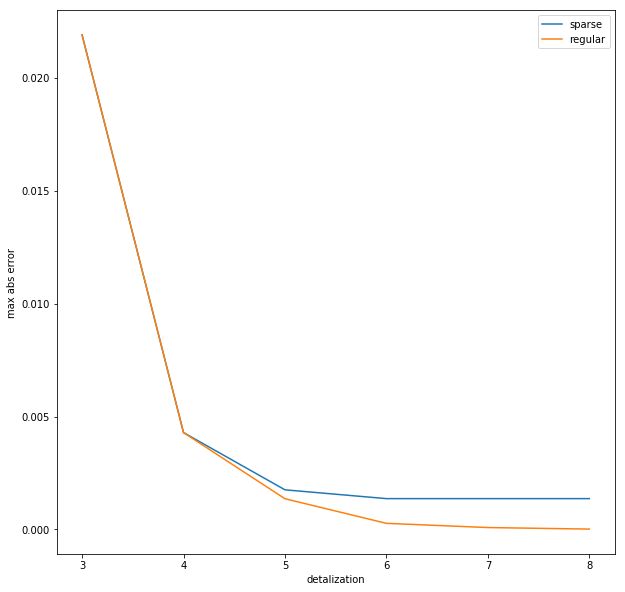

In [2]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('detalization')
ax.set_ylabel('max abs error')

ax.plot(detalization, sparseError, label='sparse')
ax.plot(detalization, regularError, label='regular')

ax.legend()

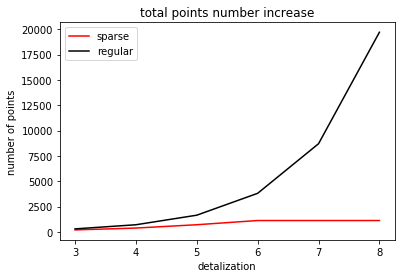

In [3]:
pointsNumber = {'sparse': [], 'regular': []}
for points, type in zip([regularGrid['x'], sparseGrid['x']], ['regular', 'sparse']):
    pointsNumber[type] = [len(points[i]) for i in range(len(points))]

fig, ax = plt.subplots()

ax.set_xlabel('detalization')
ax.set_ylabel('number of points')
ax.set_title("total points number increase")

ax.plot(detalization, pointsNumber['sparse'], label='sparse', color='red')
ax.plot(detalization, pointsNumber['regular'], label='regular', color='k')
ax.legend()

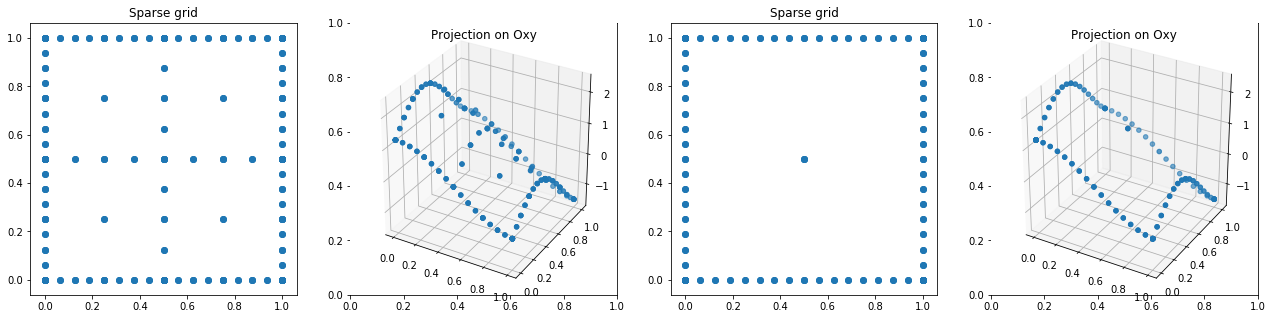

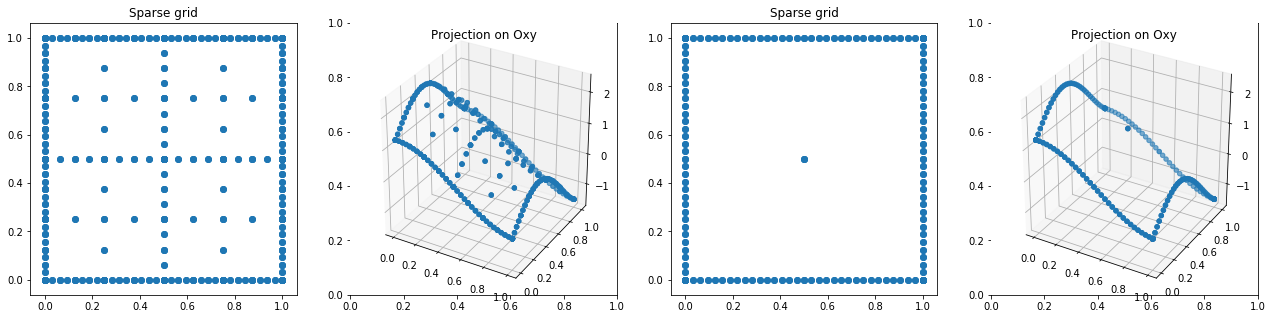

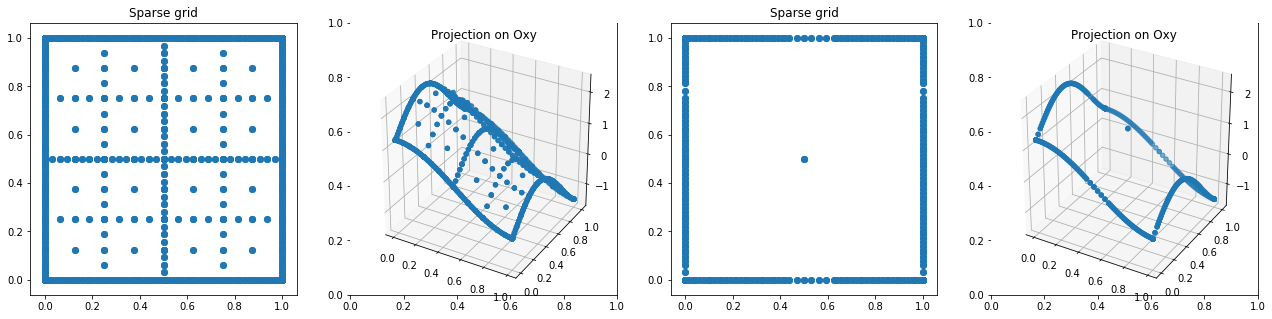

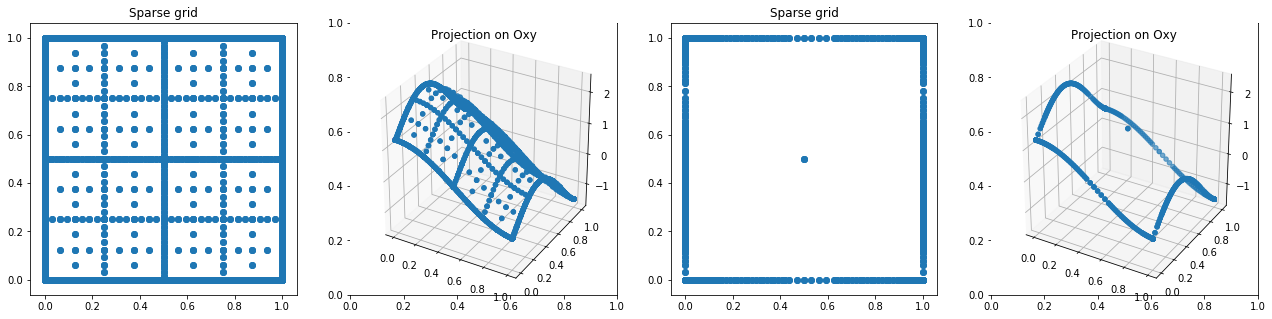

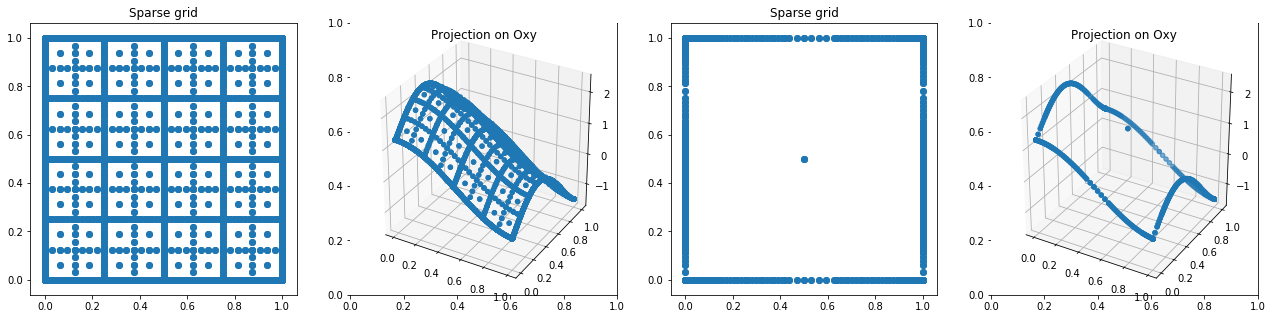

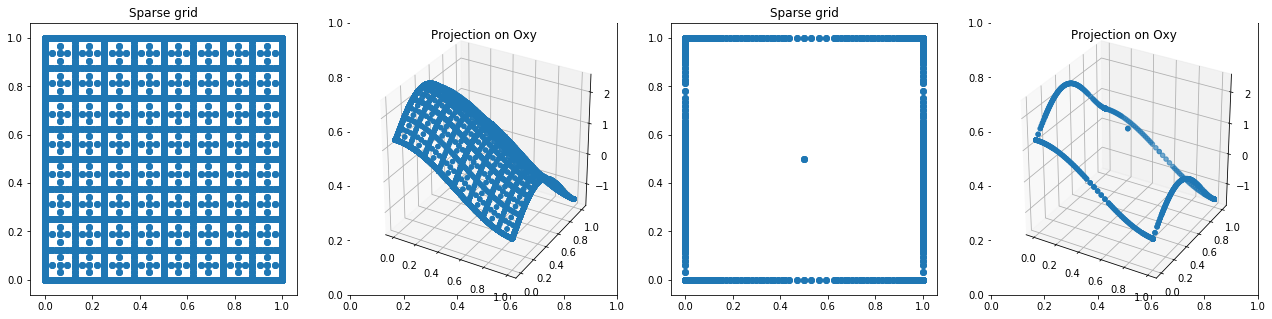

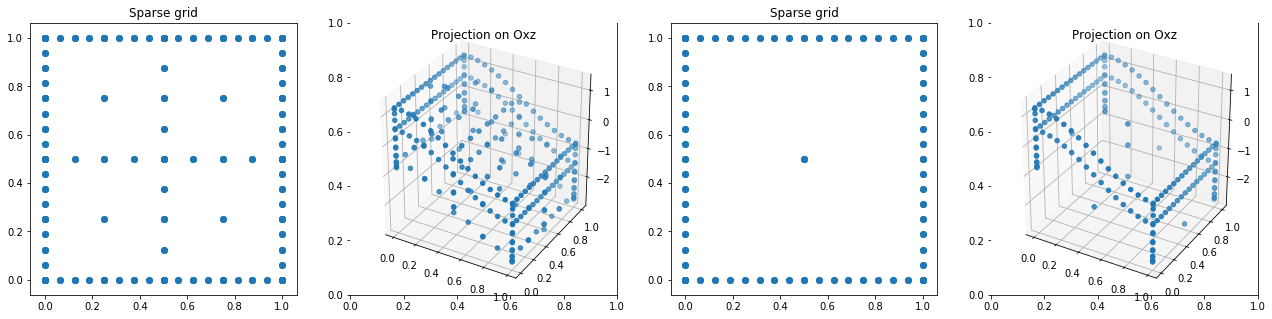

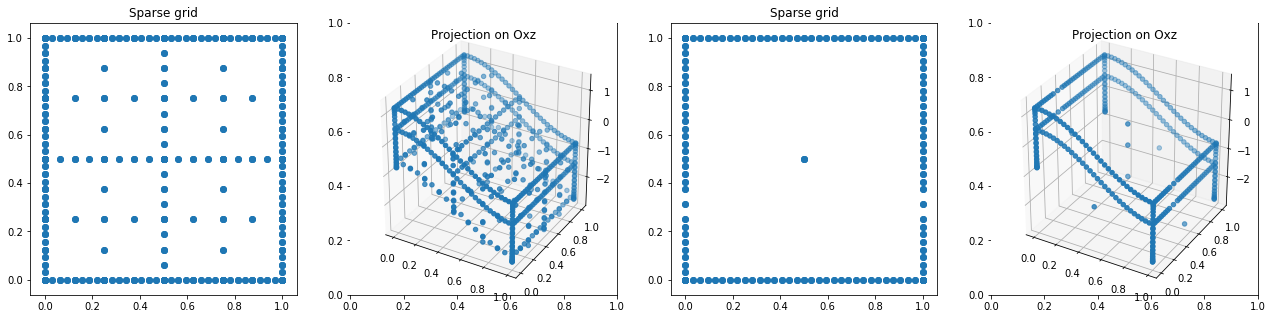

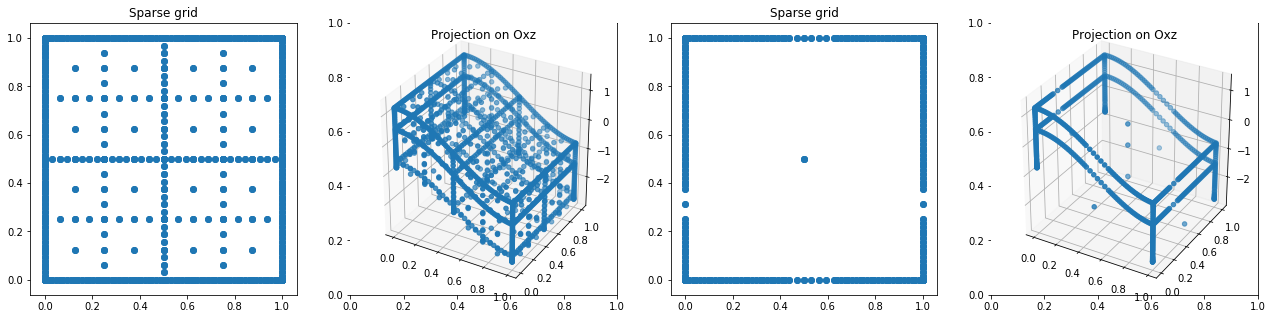

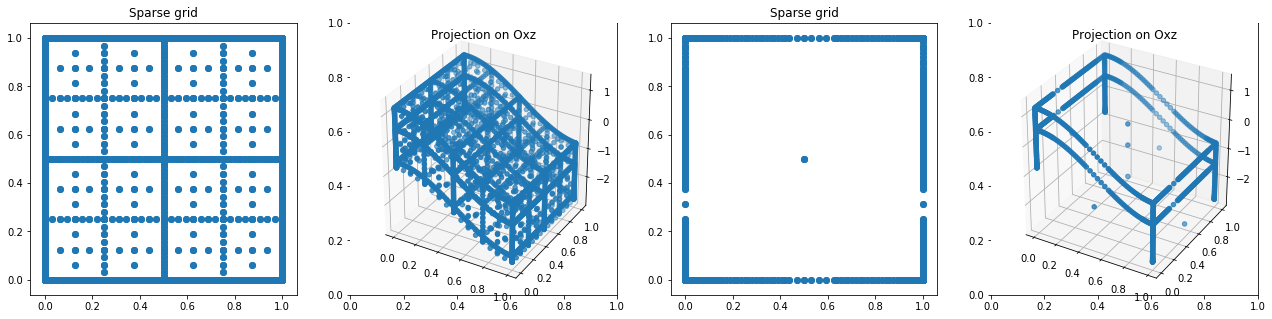

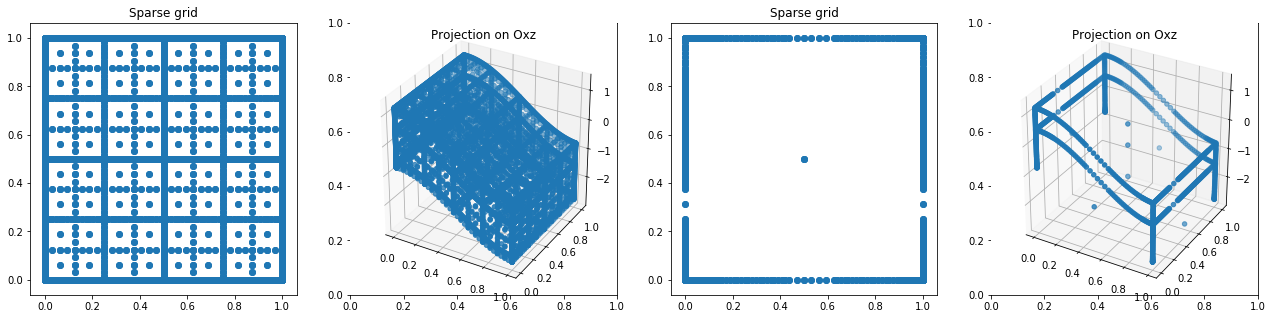

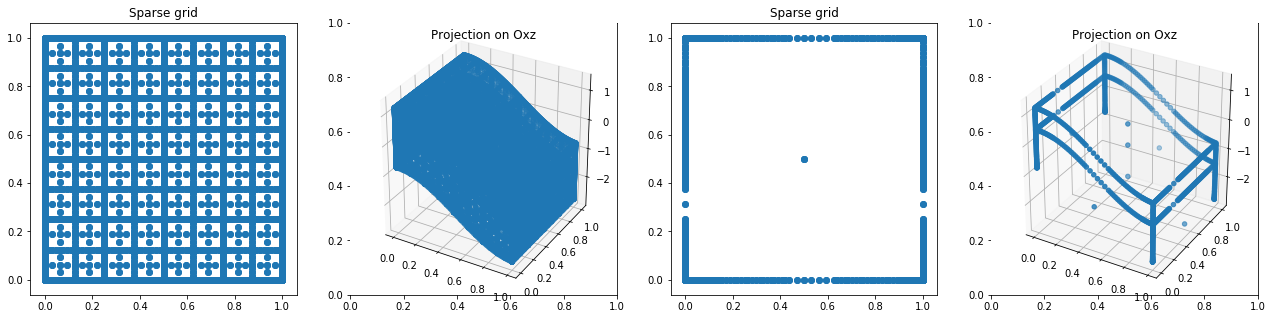

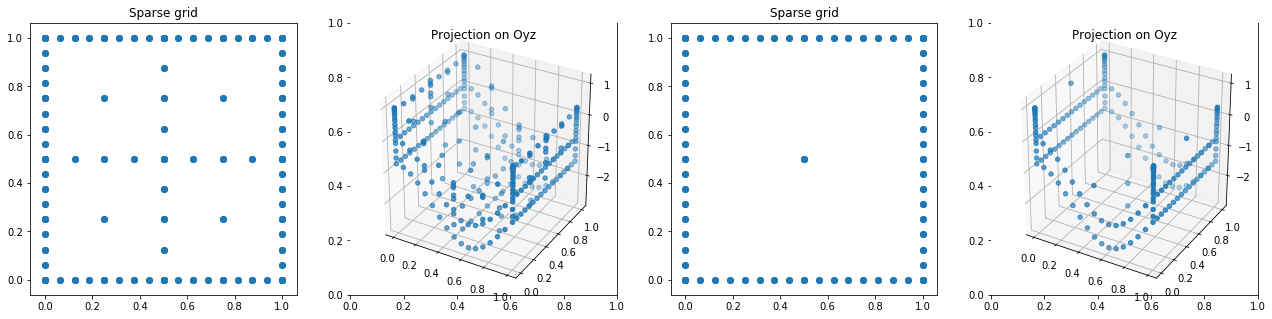

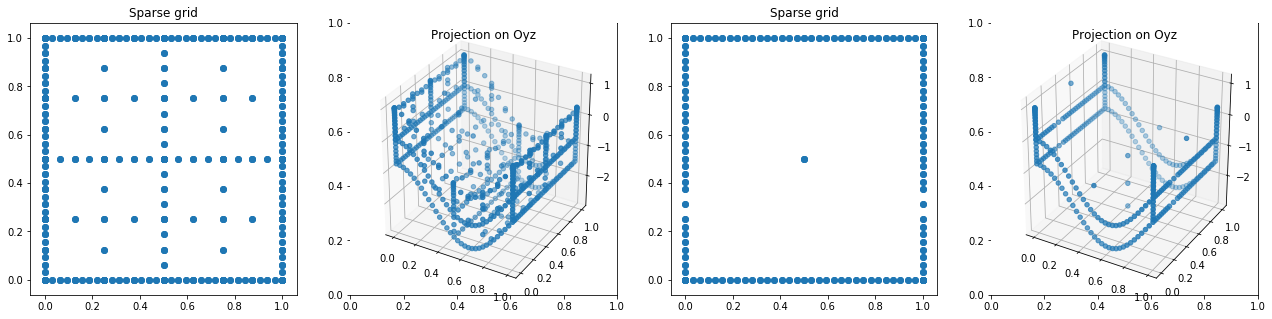

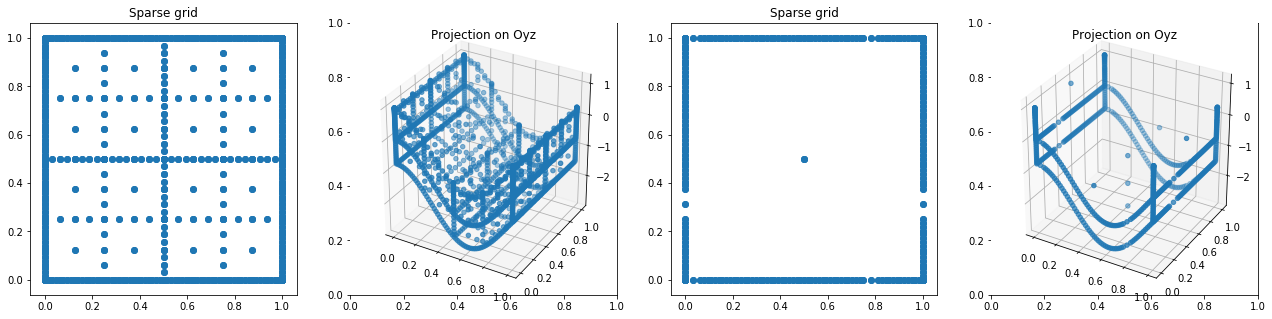

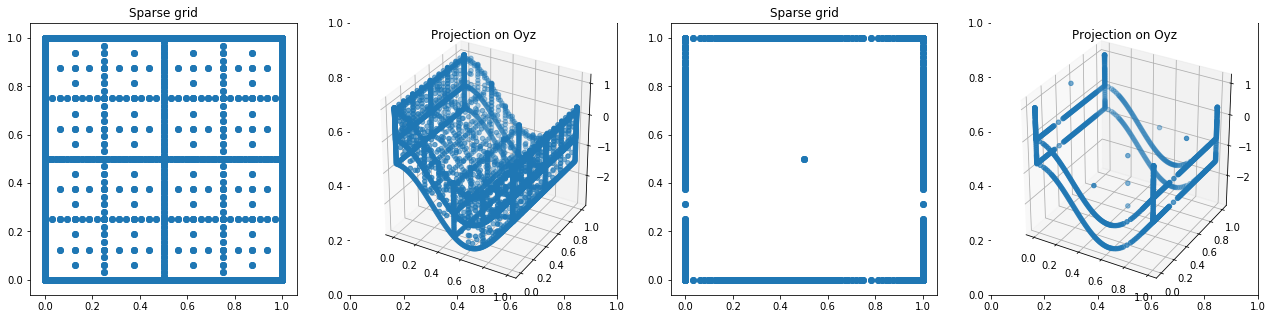

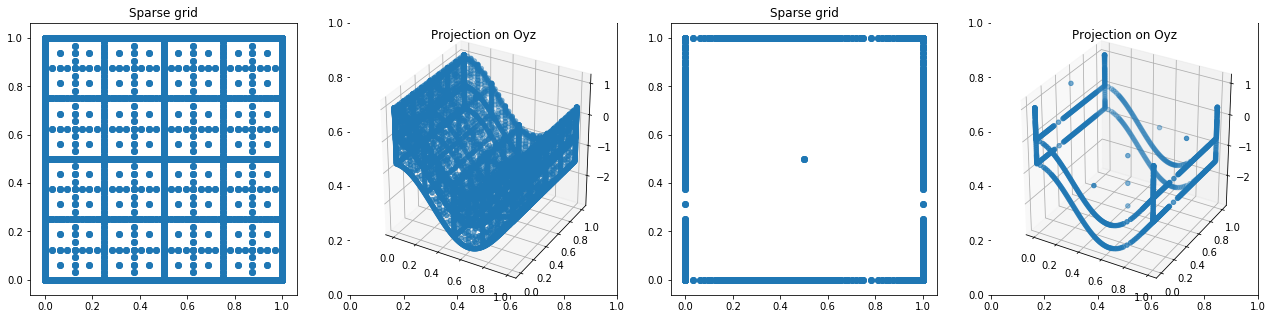

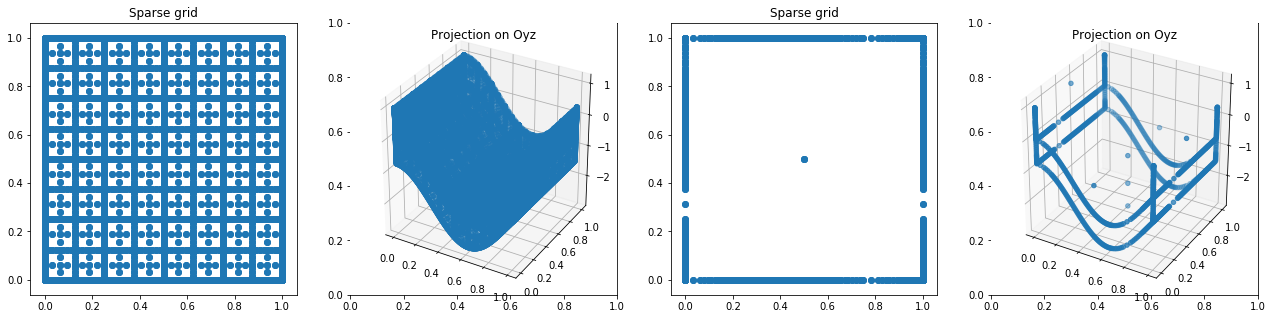

In [4]:
for projection in [('x', 'y'), ('x', 'z'), ('y', 'z')]:
    axis_1 = projection[0]
    axis_2 = projection[1]
    plane = axis_1 + axis_2

    for i in range(len(detalization)):
        fig, ax = plt.subplots(1, 4, figsize=(22, 5))
        for k, grid in enumerate((regularGrid, sparseGrid)):
            ax[2 * k].scatter(grid[axis_1][i], grid[axis_2][i])
            ax[2 * k + 1] = fig.add_subplot(1, 4, 2 * k + 2, projection='3d')
            ax[2 * k + 1].scatter(grid[axis_1][i], grid[axis_2][i], grid['f'][plane][i])

            ax[2 * k].set_title("Sparse grid")
            ax[2 * k + 1].set_title("Projection on O" + plane)